In [1]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime 
import matplotlib.pyplot as plt
# Shows plots in jupyter notebook
%matplotlib inline
# Set plot style
sns.set(color_codes=True)

Lets read the dataset that we obtained from feature engineering. This dataframe will be used for further machine learning algorithm. This is a classic churn, non-churn problem which is a classification problem. 

In [4]:
df = pd.read_pickle("/content/drive/MyDrive/Hamed Presentation /feature_engineering_data.pkl")

In [5]:
df

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,...,channel_sdd,channel_usi,origin_ewx,origin_kam,origin_ldk,origin_lxi,origin_usa,mean_year_price_p1,mean_year_price_p2,mean_year_price_p3
0,24011ae4ebbe3035111d65fa7c15bc57,4.268365,4.739944,0.000000,3.041639,0.0,0.444045,0.114481,0.098142,40.606701,...,0,0,0,0,0,1,0,41.067053,22.452760,14.967871
1,d29c2c54acc38ff3c0614d0a653813dd,3.668479,0.000000,0.000000,2.280920,0.0,1.237292,0.145711,0.000000,44.311378,...,0,0,0,1,0,0,0,44.460984,0.007124,0.000000
2,764c75f661154dac3a6c254cd082ea7d,2.736397,0.000000,0.000000,1.689841,0.0,1.599009,0.165794,0.087899,44.311378,...,0,0,0,1,0,0,0,44.555962,0.088421,0.000000
3,bba03439a292a1e166f80264c16191cb,3.200029,0.000000,0.000000,2.382089,0.0,1.318689,0.146694,0.000000,44.311378,...,0,0,0,1,0,0,0,44.551475,0.000000,0.000000
4,149d57cf92fc41cf94415803a877cb4b,3.646011,0.000000,2.721811,2.650065,0.0,2.122969,0.116900,0.100015,40.606701,...,0,0,0,1,0,0,0,40.812330,24.516531,16.348129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14601,18463073fb097fc0ac5d3e040f356987,4.508812,4.680707,0.000000,3.667360,0.0,1.291591,0.138305,0.000000,44.311378,...,0,0,0,0,0,1,0,44.514760,0.000000,0.000000
14602,d0a6f71671571ed83b2645d23af6de00,3.858778,0.000000,2.260071,2.801191,0.0,2.161458,0.100167,0.091892,43.148907,...,0,0,0,0,0,1,0,59.122473,36.488785,8.416235
14603,10e6828ddd62cbcf687cb74928c4c2d2,3.265996,0.000000,2.255273,2.281919,0.0,2.115943,0.116900,0.100015,40.606701,...,0,0,0,0,0,1,0,40.826071,24.524832,16.353854
14604,1cf20fd6206d7678d5bcafd28c53b4db,2.120574,0.000000,0.000000,3.058385,0.0,0.912753,0.145711,0.000000,44.311378,...,0,0,0,0,0,1,0,44.460984,0.007124,0.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14606 entries, 0 to 14605
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   cons_12m                        14606 non-null  float64
 2   cons_gas_12m                    14606 non-null  float64
 3   cons_last_month                 14606 non-null  float64
 4   forecast_cons_12m               14606 non-null  float64
 5   forecast_discount_energy        14606 non-null  float64
 6   forecast_meter_rent_12m         14606 non-null  float64
 7   forecast_price_energy_off_peak  14606 non-null  float64
 8   forecast_price_energy_peak      14606 non-null  float64
 9   forecast_price_pow_off_peak     14606 non-null  float64
 10  has_gas                         14606 non-null  int64  
 11  imp_cons                        14606 non-null  float64
 12  margin_gross_pow_ele            

In [7]:
df.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,...,channel_sdd,channel_usi,origin_ewx,origin_kam,origin_ldk,origin_lxi,origin_usa,mean_year_price_p1,mean_year_price_p2,mean_year_price_p3
count,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,...,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,4.257608,0.658155,2.264646,3.058385,0.000037,1.517203,0.137140,0.050491,43.148907,0.181501,...,0.000753,0.094139,0.000068,0.293989,0.215528,0.485896,0.000137,43.384964,9.512937,6.125956
std,0.750485,1.524138,1.769305,0.454794,0.000195,0.571481,0.019310,0.049037,2.002965,0.385446,...,0.027434,0.292033,0.008274,0.455602,0.411202,0.499818,0.011701,2.719731,12.094056,7.806248
min,1.934498,0.000000,0.000000,1.579212,0.000000,0.000000,0.092453,0.000000,35.555768,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.677807,0.000000,0.000000
25%,3.775100,0.000000,0.000000,2.754021,0.000000,1.235023,0.116509,0.000000,40.606701,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.815953,0.000000,0.000000
50%,4.167775,0.000000,2.899547,3.058385,0.000000,1.296555,0.143166,0.084138,44.311378,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,44.436808,0.084588,0.000000
75%,4.597146,0.000000,3.529430,3.379956,0.000000,2.120673,0.146348,0.098837,44.311378,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,44.519593,24.477135,16.320634
max,6.601155,5.544051,5.887169,4.496211,0.001064,2.778376,0.210689,0.195975,53.284378,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,59.504483,36.587507,16.911504


## Priority 1 : Logistic Regression 

Lets go for the basic algorithm first. There are three presumptions for logistic regression to be applied, 

1. The data should be linearly separable 
2. No multicolinearity in data 
3. Binary and dichotomous classification 
4. Large sample 

Do check this Kaggle notebook : https://www.kaggle.com/code/prashant111/logistic-regression-classifier-tutorial/notebook

In [8]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split
X = df.drop(["churn","id"], axis = 1)
y = df["churn"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [9]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((11684, 34), (2922, 34))

In [10]:
X_test.shape

(2922, 34)

In [11]:
cols = X_train.columns

https://www.geeksforgeeks.org/data-pre-processing-wit-sklearn-using-standard-and-minmax-scaler/#:~:text=MinMax%20Scaler%20shrinks%20the%20data,shape%20of%20the%20original%20distribution.

In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [13]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [14]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [15]:
X_train.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,...,channel_sdd,channel_usi,origin_ewx,origin_kam,origin_ldk,origin_lxi,origin_usa,mean_year_price_p1,mean_year_price_p2,mean_year_price_p3
count,11684.000000,11684.000000,11684.000000,11684.000000,11684.000000,11684.000000,11684.000000,11684.000000,11684.000000,11684.000000,...,11684.000000,11684.000000,11684.0,11684.000000,11684.000000,11684.000000,11684.000000,11684.000000,11684.000000,11684.000000
mean,0.498924,0.118630,0.386279,0.507835,0.033471,0.548000,0.375756,0.260369,0.426785,0.181445,...,0.000856,0.093033,0.0,0.295361,0.216279,0.483910,0.000171,0.437344,0.264353,0.368000
std,0.160650,0.275051,0.300253,0.156548,0.179853,0.206316,0.163149,0.249991,0.113063,0.385403,...,0.029244,0.290491,0.0,0.456224,0.411724,0.499762,0.013083,0.096043,0.331787,0.462921
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.394922,0.000000,0.000000,0.403526,0.000000,0.444604,0.202028,0.000000,0.284903,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.348167,0.000000,0.000000
50%,0.479845,0.000000,0.493581,0.507087,0.000000,0.468270,0.428913,0.429330,0.493869,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.474451,0.002315,0.000000
75%,0.572225,0.000000,0.600044,0.619443,0.000000,0.763313,0.455826,0.504355,0.493869,0.000000,...,0.000000,0.000000,0.0,1.000000,0.000000,1.000000,0.000000,0.477381,0.669060,0.965061
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [16]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression


# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)


# fit the model
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [17]:
y_pred_test = logreg.predict(X_test)

y_pred_test

array([0, 0, 0, ..., 0, 0, 0])

In [21]:
negative = 0
positive = 0
for pred in y_pred_test:
  if pred == 0:
    negative = negative +1 
  else:
    positive = positive +1 

print("Non churn cases: {}".format(negative))
print("Churn cases: {}".format(positive))

Non churn cases: 2921
Churn cases: 1


Although accuracy score is not a right metrics to evaluate the model in our case. This is because our churn and non churn data is not balanced. The percentage of churn out of total is just 10%. It will always look good with accuracy score. 

In [22]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.9141


Checking the train-set and test-set accuracy. Now, I will compare the train-set and test-set accuracy to check for overfitting.

If these two values are quite comparable (train test and test set). So, there will be no question of overfitting.

In Logistic Regression, we use default value of C = 1. It provides good performance with approximately 85% accuracy on both the training and the test set. But if the model performance on both the training and test set are very comparable. It will likely be the case of underfitting.

I will increase C and fit a more flexible model.Smaller values of C specify stronger regularization. Whereas larger values specify weaker regularization. 

In [23]:
y_pred_train = logreg.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Training-set accuracy score: 0.9001
Model accuracy score: 0.9141


Now lets make the regularization relaxed and see whether the condition remain the same for test set and training set. If the efficiency remains high on training and testing dataset then we cannot trust the model much as this model is underfitting because the data for churn is quite biased. We may be generating a biased database. 

In [24]:
# fit the Logsitic Regression model with C=100

# instantiate the model
logreg100 = LogisticRegression(C=100, solver='liblinear', random_state=0)


# fit the model
logreg100.fit(X_train, y_train)

LogisticRegression(C=100, random_state=0, solver='liblinear')

In [25]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg100.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg100.score(X_test, y_test)))

Training set score: 0.8999
Test set score: 0.9134


We can see that, C=100 results in higher test set accuracy and also a slightly decreased training set accuracy. So, we can conclude that a more complex model should perform better. Lets investigate with C = 0.001. There is no change with regularization owing to a biased data that is there and hence we should move towards more complex model to address the problem. 

In [26]:
# fit the Logsitic Regression model with C=001

# instantiate the model
logreg001 = LogisticRegression(C=0.01, solver='liblinear', random_state=0)


# fit the model
logreg001.fit(X_train, y_train)

LogisticRegression(C=0.01, random_state=0, solver='liblinear')

In [27]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg001.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg001.score(X_test, y_test)))

Training set score: 0.8999
Test set score: 0.9144


Compare model accuracy with null accuracy

So, the model accuracy is 0.9144. But, we cannot say that our model is very good based on the above accuracy. We must compare it with the null accuracy. Null accuracy is the accuracy that could be achieved by always predicting the most frequent class.

So, we should first check the class distribution in the test set.

In [28]:
# check class distribution in test set

y_test.value_counts()

0    2672
1     250
Name: churn, dtype: int64

In [29]:
# check null accuracy score

null_accuracy = (2672/(2672+250))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.9144


As we can see now that our null accuracy is equivalent to our test set accuracy and train set accuracy. This is a clear indication that our model is getting biased and not performing a very good job. In this case lets move from accuracy metrics towards confusion metrics. 

In [35]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[1,1])

print('\nTrue Negatives(TN) = ', cm[0,0])

print('\nFalse Positives(FP) = ', cm[1,0])

print('\nFalse Negatives(FN) = ', cm[0,1])

Confusion matrix

 [[2671    1]
 [ 250    0]]

True Positives(TP) =  0

True Negatives(TN) =  2671

False Positives(FP) =  250

False Negatives(FN) =  1


Now from the confusion metrics we can clearly see that True Positive Rate is nearly equal to null accurcay. The distribution of X test and X train nearly remians the same. 

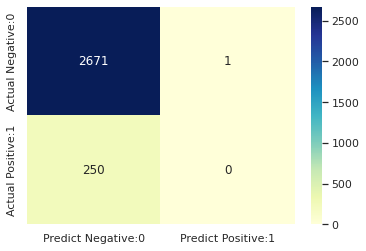

In [40]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Predict Negative:0', 'Predict Positive:1'], 
                                 index=['Actual Negative:0', 'Actual Positive:1'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

Classification Report

In [41]:
# print classification accuracy
TP = cm[1,1]
TN = cm[0,0]
FP = cm[1,0]
FN = cm[0,1]

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.9141


In [42]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 0.0000


In [43]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.0000


In [44]:
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.0000


In [45]:
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.0856


badHaving a look at precision and recall we can say that model is doing a great job. But again the point of concern remains that the split has been a biased one. As we can see that our test split contained just 1 non churn candidate and other churn candidates. We have a high false positive rate as we had only one non churn candidate which was predicted wrongly. 

AUC ROC Curve

In [46]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

y_pred1 = logreg.predict_proba(X_test)[:,1]

ROC_AUC = roc_auc_score(y_test, y_pred1)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.6265


Now from ROC AUC score we can understand that our classifier is not that good as well, but its not worth rejecting. ROC AUC score near to 1 suggest the perfect classifier and below 0.5 suggest a bad classifier. Anything above 0.5 is acceptable but as our classifier was looking nearly perfect from the above metrics. It fails to satisfy the same degree with ROC AUC metrics. 

As we know our train set has been biased lets use cross validation to evaluate our metrics of the model. 

In [47]:
# calculate cross-validated ROC AUC 

from sklearn.model_selection import cross_val_score

Cross_validated_ROC_AUC = cross_val_score(logreg, X_train, y_train, cv=5, scoring='roc_auc').mean()

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.6462


K fold cross validation 

Accuracy is not a very strong parameter to judge the performance because the churn data is biased and not balanced. 

In [48]:
# Applying 10-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(logreg, X_train, y_train, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.89991446 0.89991446 0.89991446 0.90076989 0.90068493 0.89982877
 0.89982877 0.89982877 0.89982877 0.89982877]


Hyperparameter tuning of the model 

https://www.youtube.com/watch?v=355u2bDqB7c

In [49]:
from sklearn.model_selection import GridSearchCV


parameters = [{'penalty':['l1','l2']}, 
              {'C':[1, 10, 100, 1000]}]



grid_search = GridSearchCV(estimator = logreg,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)


grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(random_state=0, solver='liblinear'),
             param_grid=[{'penalty': ['l1', 'l2']}, {'C': [1, 10, 100, 1000]}],
             scoring='accuracy')

In [50]:
#examine the best model

# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

GridSearch CV best score : 0.9000


Parameters that give the best results : 

 {'penalty': 'l1'}


Estimator that was chosen by the search : 

 LogisticRegression(penalty='l1', random_state=0, solver='liblinear')


In [51]:
# calculate GridSearch CV score on test set

print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(X_test, y_test)))

GridSearch CV score on test set: 0.9141
